# 2025/10/14

## 埋め込みモデル

### transformerとsentence-transformerの違い

- huggingfaceの開発した大元が前者．後者は埋め込みモデルの専用ライブラリ

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese")
model = AutoModel.from_pretrained("cl-tohoku/bert-base-japanese")

text = "企業のガバナンスが強化された。"
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

embedding = outputs.last_hidden_state[:,0,:]  # [CLS] のベクトル（文全体の埋め込み）

In [2]:
type(outputs)

transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions

In [3]:
dir(outputs)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'attentions',
 'clear',
 'copy',
 'cross_attentions',
 'fromkeys',
 'get',
 'hidden_states',
 'items',
 'keys',
 'last_hidden_state',
 'move_to_end',
 'past_key_values',
 'pooler_output',
 'pop',
 'popitem',
 'setdefault',
 'to_tuple',
 'update',
 'values']

In [4]:
[x for x in dir(outputs) if not x.startswith('_')]

['attentions',
 'clear',
 'copy',
 'cross_attentions',
 'fromkeys',
 'get',
 'hidden_states',
 'items',
 'keys',
 'last_hidden_state',
 'move_to_end',
 'past_key_values',
 'pooler_output',
 'pop',
 'popitem',
 'setdefault',
 'to_tuple',
 'update',
 'values']

In [5]:
help(outputs)

Help on BaseModelOutputWithPoolingAndCrossAttentions in module transformers.modeling_outputs object:

class BaseModelOutputWithPoolingAndCrossAttentions(transformers.utils.generic.ModelOutput)
 |  BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state: Optional[torch.FloatTensor] = None, pooler_output: Optional[torch.FloatTensor] = None, hidden_states: Optional[tuple[torch.FloatTensor, ...]] = None, past_key_values: Optional[transformers.cache_utils.Cache] = None, attentions: Optional[tuple[torch.FloatTensor, ...]] = None, cross_attentions: Optional[tuple[torch.FloatTensor, ...]] = None) -> None
 |
 |  Base class for model's outputs that also contains a pooling of the last hidden states.
 |
 |  Args:
 |      last_hidden_state (`torch.FloatTensor` of shape `(batch_size, sequence_length, hidden_size)`):
 |          Sequence of hidden-states at the output of the last layer of the model.
 |      pooler_output (`torch.FloatTensor` of shape `(batch_size, hidden_size)`):
 |          L

In [6]:
vars(outputs) #または outputs.__dict__

{'last_hidden_state': tensor([[[-6.5203e-02,  7.1276e-01, -1.5794e-01,  ..., -4.2521e-01,
            5.1118e-01, -6.6665e-01],
          [-2.4340e-01,  5.7577e-01, -4.1902e-04,  ..., -1.3879e-01,
           -9.7214e-03, -5.0662e-01],
          [ 3.0892e-01, -4.4592e-02,  8.4382e-02,  ..., -9.7296e-02,
            4.1770e-01,  3.9336e-02],
          ...,
          [ 5.2119e-01,  3.0566e-01, -2.8654e-01,  ..., -3.9021e-01,
            2.9763e-01, -1.0418e-01],
          [ 2.3588e-01,  8.1451e-01,  4.3639e-01,  ...,  6.6737e-01,
            1.5870e-01,  4.9991e-01],
          [ 2.3336e-01,  8.1559e-01,  4.3121e-01,  ...,  6.6780e-01,
            1.6036e-01,  5.0076e-01]]]),
 'pooler_output': tensor([[-1.9083e-01,  9.8540e-01,  9.2980e-03, -2.0109e-01, -7.5957e-02,
           2.1994e-01,  1.3447e-01,  4.0794e-02,  8.1035e-02, -5.5574e-02,
           2.1607e-01, -1.5225e-01, -6.5523e-01,  8.5597e-02,  4.6481e-02,
           2.3583e-01,  7.5323e-01, -1.4019e-01, -3.0202e-01, -2.2001e-01,
  

In [7]:
embedding.shape

torch.Size([1, 768])

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese")
model = AutoModel.from_pretrained("cl-tohoku/bert-base-japanese")

## 埋め込みベクトルを得るにはsentence_transromersを使ったほうが良い

In [22]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
sentences = ["企業のガバナンスが強化された。", "企業統治の重要性が増している。", "会社の管理体制が改善された。", "今日は良い天気ですね。", "明日は雨が降るかもしれない。"
             "昨日はとても寒かった。", "この映画はとても面白かった。", "彼のプレゼンテーションは素晴らしかった。"]
embeddings = model.encode(sentences)

In [13]:
from rich import inspect

inspect(model, methods=True, all=False)

╭─ SentenceTransformer(   (0): Transformer({'max_seq_length': 128, 'do_lower_case': False, 'architecture': 'BertM─╮
│ def (*args, **kwargs):                                                                                          │
│                                                                                                                 │
│ Loads or creates a SentenceTransformer model that can be used to map sentences / text to embeddings.            │
│                                                                                                                 │
│                            backend = 'torch'                                                                    │
│                    call_super_init = False                                                                      │
│                default_prompt_name = None                                                                       │
│                             device = device(type='mps', index=0)                                                │
│                              dtype = torch.float32                                                              │
│                       dump_patches = False                                                                      │
│               is_hpu_graph_enabled = False                                                                      │
│                     max_seq_length = 128                                                                        │
│                    model_card_data = SentenceTransformerModelCardData(                                          │
│                                          language=[],                                                           │
│                                          license=None,                                                          │
│                                          model_name=None,                                                       │
│                                          model_id=None,                                                         │
│                                          train_datasets=[],                                                     │
│                                          eval_datasets=[],                                                      │
│                                          task_name='semantic textual similarity, semantic search, paraphrase    │
│                                      mining, text classification, clustering, and more',                        │
│                                          tags=[                                                                 │
│                                              'sentence-transformers',                                           │
│                                              'sentence-similarity',                                             │
│                                              'feature-extraction',                                              │
│                                              'dense'                                                            │
│                                          ],                                                                     │
│                                          local_files_only=False,                                                │
│                                          generate_widget_examples=True,                                         │
│                                          base_model='sentence-transformers/paraphrase-multilingual-MiniLM-L12-… │
│                                          base_model_revision='86741b4e3f5cb7765a600d3a3d55a0f6a6cb443d',        │
│                                          non_default_hyperparameters={},                                        │
│                                          all_hyperparameters={},                                                │
│                                          eval_results_

In [15]:
import rich

In [17]:
?rich.inspect

Signature:
rich.inspect(
    obj: Any,
    *,
    console: Optional[ForwardRef('Console')] = None,
    title: Optional[str] = None,
    help: bool = False,
    methods: bool = False,
    docs: bool = True,
    private: bool = False,
    dunder: bool = False,
    sort: bool = True,
    all: bool = False,
    value: bool = True,
) -> None
Docstring:
Inspect any Python object.

* inspect(<OBJECT>) to see summarized info.
* inspect(<OBJECT>, methods=True) to see methods.
* inspect(<OBJECT>, help=True) to see full (non-abbreviated) help.
* inspect(<OBJECT>, private=True) to see private attributes (single underscore).
* inspect(<OBJECT>, dunder=True) to see attributes beginning with double underscore.
* inspect(<OBJECT>, all=True) to see all attributes.

Args:
    obj (Any): An object to inspect.
    title (str, optional): Title to display over inspect result, or None use type. Defaults to None.
    help (bool, optional): Show full help text rather than just first paragraph. Defaults to Fals

In [18]:
?model

Signature:      model(*args, **kwargs)
Type:           SentenceTransformer
String form:   
SentenceTransformer(
           (0): Transformer({'max_seq_length': 128, 'do_lower_case': False, 'architec <...> ing_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
           )
Length:         2
File:           ~/.venv/py12_torch/lib/python3.12/site-packages/sentence_transformers/SentenceTransformer.py
Docstring:     
Loads or creates a SentenceTransformer model that can be used to map sentences / text to embeddings.

Args:
    model_name_or_path (str, optional): If it is a filepath on disk, it loads the model from that path. If it is not a path,
        it first tries to download a pre-trained SentenceTransformer model. If that fails, tries to construct a model
        from the Hugging Face Hub with that name.
    modules (Iterable[nn.Module], optional): A list of torch Modules that should be called sequentially, can be used to create custom
        S

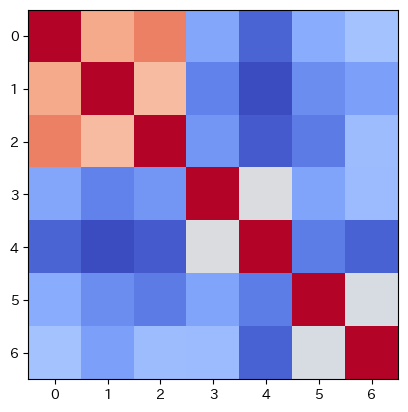

In [23]:
sim = model.similarity(embeddings, embeddings)
plt.imshow(sim, cmap='coolwarm', interpolation='nearest')

### embeddingsをpcaで2次元に圧縮してプロット

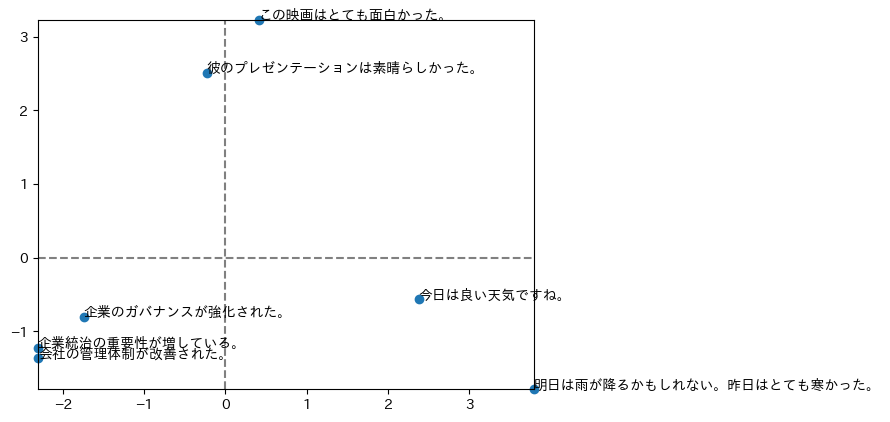

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], clip_on=False)
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (embeddings_2d[i,0], embeddings_2d[i,1]))

plt.hlines(0, xmin=min(embeddings_2d[:,0]), xmax=max(embeddings_2d[:,0]), colors='gray', linestyles='dashed')
plt.vlines(0, ymin=min(embeddings_2d[:,1]), ymax=max(embeddings_2d[:,1]), colors='gray', linestyles='dashed')
plt.xlim(min(embeddings_2d[:,0]), max(embeddings_2d[:,0]))
plt.ylim(min(embeddings_2d[:,1]), max(embeddings_2d[:,1]))
plt.show()

## 埋め込みベクトルの空間的な距離を測る

In [11]:
from pathlib import Path
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.linalg import orthogonal_procrustes

# 例: 各時点の埋め込み（語彙×次元）
E_2000 = np.load(Path("../embeddings/embeddings_2000.npy"))
E_2010 = np.load(Path("../embeddings/embeddings_2010.npy"))
E_2020 = np.load(Path("../embeddings/embeddings_2020.npy"))

# プロクラステス整列
R, _ = orthogonal_procrustes(E_2010, E_2000)
E_2010_aligned = E_2010 @ R

# 各語彙の意味ドリフト測定（コサイン類似度）
similarities = np.diag(cosine_similarity(E_2010, E_2010_aligned))
drift = 1 - similarities  # 数値が大きいほど意味変化が大きい
print(drift)

# プロクラステス整列
R, _ = orthogonal_procrustes(E_2020, E_2010)
E_2020_aligned = E_2020 @ R

# 各語彙の意味ドリフト測定（コサイン類似度）
similarities = np.diag(cosine_similarity(E_2010, E_2020_aligned))
drift = 1 - similarities  # 数値が大きいほど意味変化が大きい
print(drift)

# 変化上位語彙を抽出
top_indices = np.argsort(drift)[-10:]

[0.00087499 0.00085452 0.00154821 0.00092361 0.00134445 0.00180388
 0.00091378 0.00135521 0.00202968 0.00145692 0.00071114 0.00106793
 0.00122183 0.00108085 0.00080928 0.00134596 0.0010063  0.00148447
 0.00067963 0.00129585 0.0009101  0.00112746 0.00084678 0.00134354
 0.00165769 0.00108966 0.00109411 0.001166   0.0013503  0.00104885
 0.0008581  0.00156957 0.00086811 0.00121476 0.00120033 0.00088519
 0.00139656 0.00103872 0.00113564 0.0019402  0.00140128 0.00134276
 0.00171682 0.00113173 0.00073176 0.00120568 0.00121603 0.00179757
 0.00089506 0.00158575 0.00094114 0.00139006 0.00152983 0.00065104
 0.00138998 0.00167524 0.00126983 0.00105634 0.00104455 0.00076912
 0.00167979 0.00075202 0.00143478 0.00091035 0.00105381 0.0011461
 0.00119931 0.00109918 0.0012551  0.00120452 0.00127751 0.00093576
 0.00105497 0.00152431 0.00121784 0.00132198 0.00144107 0.00124123
 0.00134908 0.0013023  0.00164607 0.00124719 0.00136439 0.0010553
 0.00121005 0.00081146 0.00093064 0.00139605 0.00070137 0.001281

In [12]:
top_indices

array([63, 19,  3, 85, 22, 72, 34, 58,  4, 52])